In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [4]:
df=pd.read_csv("IPL 2022 Batters.csv")
df

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50.00,0,0,0


In [9]:
#Check if there is any null value in data if yes please handle it

if df.isnull().sum().sum() == 0:
    print("There are 0 null values, Already Handled")
else:
    print("There are null values")

There are 0 null values


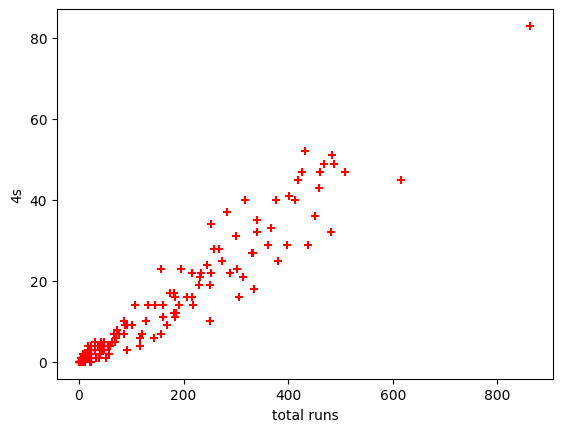

In [51]:
#Using matplotlib find correlation in the data
%matplotlib inline
plt.ylabel('4s')
plt.xlabel('total runs')
plt.scatter(df.Runs,df['4s'],color='red',marker='+')
#plt.plot(df.Runs,df['4s'],color='blue')

In [52]:
reg=linear_model.LinearRegression()
reg.fit(df[['Runs']],df['4s'])

LinearRegression()

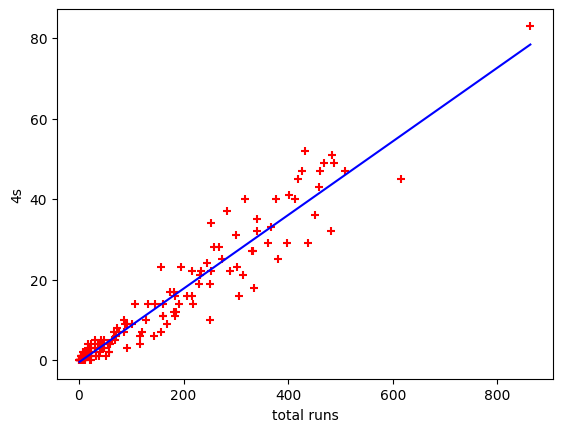

In [55]:
#Using matplotlib find correlation in the data
%matplotlib inline
plt.ylabel('4s')
plt.xlabel('total runs')
plt.scatter(df.Runs,df['4s'],color='red',marker='+')
plt.plot(df.Runs,reg.predict(df[['Runs']]),color='blue')
#It is linearly correlated

In [64]:
#Linear Regression
reg.coef_, reg.intercept_


(array([0.091479]), -0.5665055486173944)

In [73]:
feature=df[['Runs','Inns','Mat']].copy()
feature

,Runs,Inns,Mat
0,863,17,17
1,616,15,15
2,508,15,15
3,487,15,15
4,483,16,16
...,...,...,...
157,2,1,3
158,2,2,5
159,2,5,9
160,1,1,1


In [72]:
target=df[['4s']].copy()
target

,4s
0,83
1,45
2,47
3,49
4,51
...,...
157,0
158,0
159,0
160,0


In [88]:
'''reg2=linear_model.LinearRegression()
reg2.fit(feature,target)
reg2.coef_
p=reg2.predict(feature)
feature['4s-predicted target']=p
feature'''

"reg2=linear_model.LinearRegression()\nreg2.fit(feature,target)\nreg2.coef_\np=reg2.predict(feature)\nfeature['4s-predicted target']=p\nfeature"

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
feature, target, test_size=0.33)

In [95]:
X_train.shape, X_test.shape, feature.shape

((108, 4), (54, 4), (162, 4))

In [96]:
reg2=linear_model.LinearRegression()
reg2.fit(X_train,y_train)
reg2.coef_


array([[ 0.09795228, -0.34890694, -0.05542463,  0.0700687 ]])

In [100]:
p=reg2.predict(X_test)
p.shape, X_test.shape


((54, 1), (54, 4))

In [ ]:
y_test[['4s']],[p]

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mean_squared_error(y_test['4s'],p)

19.84245648583539

In [149]:
j=0
mse=0
for i in y_test['4s']:
    #print(p1, p[i][0], (p1-p[i][0])*(p1-p[i][0]))
    mse+=(i-p[j][0])*(i-p[j][0])
    #print((p1-p[i][0])*(p-p[i][0]))
    j=j+1
mse/y_test.shape[0] #same as above

19.84245648583539